In [1]:
import numpy as np
import pandas as pd
from typing import Tuple

from sklearn.covariance import LedoitWolf

from pypfopt.efficient_frontier import EfficientFrontier

In [2]:
# import the data
pos = pd.read_csv('positions.csv')
ret = pd.read_csv('Returns.csv')
data_full = pd.read_csv('CryptoDataOHLCV_483.csv')
pos = pos.iloc[1600:, :]

ret = ret.iloc[1600:, :]
close_pivot = data_full.pivot_table(values='close', index='date', columns='symbol')
return_full = close_pivot.pct_change()

In [3]:
returns_p = pd.read_csv("portfolio_return.csv").set_index("Unnamed: 0")
returns_p

,1INCH-BTC,1INCH-EUR,1INCH-GBP,1INCH-USD,AAVE-BTC,AAVE-EUR,AAVE-GBP,AAVE-USD,ACH-USD,ADA-BTC,...,YFII-USD,ZEC-BTC,ZEC-USD,ZEC-USDC,ZEN-BTC,ZEN-USD,ZEN-USDT,ZRX-BTC,ZRX-EUR,ZRX-USD
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2015-04-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-04-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-04-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-04-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-04-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,0.0,0.0,-0.0,...,-0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0
2022-06-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,0.0,...,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0
2022-06-05,0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,-0.0,...,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [4]:
return_full

symbol,1INCH-BTC,1INCH-EUR,1INCH-GBP,1INCH-USD,AAVE-BTC,AAVE-EUR,AAVE-GBP,AAVE-USD,ACH-USD,ADA-BTC,...,YFII-USD,ZEC-BTC,ZEC-USD,ZEC-USDC,ZEN-BTC,ZEN-USD,ZEN-USDT,ZRX-BTC,ZRX-EUR,ZRX-USD
date,,,,,,,,,,,,,,,,,,,,,
2015-04-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03,-0.029703,-0.061272,-0.047490,-0.063441,-0.013158,-0.032881,-0.027242,-0.035267,-0.002767,-0.016154,...,-0.015485,0.017045,-0.011294,-0.015017,-0.024652,-0.041988,-0.043478,-0.018505,-0.042448,-0.049518
2022-06-04,-0.010204,-0.003695,-0.018519,-0.003444,-0.006389,0.002908,0.000000,-0.001122,-0.017745,0.005826,...,0.059373,-0.002958,0.002218,-0.000111,-0.012788,0.004534,0.000000,-0.003771,0.002176,0.003969
2022-06-05,-0.013746,-0.009889,-0.004354,-0.011521,-0.030752,-0.032500,-0.024504,-0.030607,0.001839,-0.002633,...,-0.059070,-0.010218,-0.003320,0.007679,0.022249,-0.005517,0.003030,0.029523,0.029579,0.030465


In [5]:
port1 = pd.read_csv("portfolio1.csv").set_index("date").drop(index= "2022-06-07")
port1

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
date,,,,,,,,,,,,,,,,,,,,,
2019-08-15,0.030303,0.017850,0.016364,0.020019,0.014451,-0.003246,0.025208,0.037772,0.022472,0.016516,...,0.008906,0.021549,0.034161,0.019930,0.012076,0.021985,0.017931,0.017620,0.015870,0.008410
2019-08-16,-0.003021,-0.030385,0.017049,0.001177,-0.005747,0.002955,0.014472,-0.013837,0.003759,0.009034,...,-0.018318,0.030040,0.021142,0.028194,-0.001552,-0.010455,0.028659,-0.007350,-0.001778,-0.015431
2019-08-17,-0.032164,-0.053513,-0.020477,-0.025233,-0.027933,-0.002489,-0.038113,-0.024420,-0.016636,-0.032713,...,-0.061719,-0.047831,-0.017653,-0.047550,-0.045794,-0.038764,-0.047204,-0.042829,-0.046986,-0.062787
2019-08-18,0.041096,0.063904,0.000199,-0.028525,0.052941,0.000041,0.048017,-0.015696,0.064961,-0.024855,...,0.004710,-0.011778,-0.065049,-0.010627,-0.038499,-0.041751,-0.012620,-0.037943,-0.037465,0.004607
2019-08-19,0.026562,0.012946,-0.070425,0.041346,-0.002933,-0.000499,0.011461,0.011793,-0.094474,0.031476,...,0.029079,0.031422,0.036217,0.027293,0.031289,0.034978,0.030442,0.031862,0.029304,0.028051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-02,0.040590,0.019305,0.054784,0.055072,0.040554,0.034904,0.034223,0.050704,0.050576,0.019432,...,0.023267,0.069444,0.012906,0.064057,0.023011,-0.005233,0.017894,0.020833,0.093093,-0.019549
2022-06-03,-0.015341,-0.047794,-0.000771,-0.024637,0.015060,-0.010363,-0.027989,0.024531,-0.007628,-0.014728,...,-0.011954,-0.013699,-0.008385,-0.014035,-0.011690,0.002098,0.018220,0.021277,0.001002,0.031061
2022-06-04,-0.011178,0.092369,-0.000770,0.021452,0.064103,0.019007,0.024625,-0.049383,0.012199,-0.008759,...,0.024494,0.013889,-0.007446,-0.043624,0.004055,0.017609,0.032562,-0.020833,-0.001001,0.018739


In [6]:
port2 = pd.read_csv("portfolio2.csv").set_index("date")
port2

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
date,,,,,,,,,,,,,,,,,,,,,
2019-08-15,0.017850,0.016364,0.020019,0.014451,-0.003246,0.025208,0.037772,0.022472,0.016516,0.038019,...,0.021549,0.034161,0.019930,0.012076,0.021985,0.017931,0.017620,0.015870,0.008410,0.018365
2019-08-16,-0.030385,0.017049,0.001177,-0.005747,0.002955,0.014472,-0.013837,0.003759,0.009034,0.014695,...,0.030040,0.021142,0.028194,-0.001552,-0.010455,0.028659,-0.007350,-0.001778,-0.015431,-0.006424
2019-08-17,-0.053513,-0.020477,-0.025233,-0.027933,-0.002489,-0.038113,-0.024420,-0.016636,-0.032713,-0.003853,...,-0.047831,-0.017653,-0.047550,-0.045794,-0.038764,-0.047204,-0.042829,-0.046986,-0.062787,-0.041052
2019-08-18,0.063904,0.000199,-0.028525,0.052941,0.000041,0.048017,-0.015696,0.064961,-0.024855,0.046002,...,-0.011778,-0.065049,-0.010627,-0.038499,-0.041751,-0.012620,-0.037943,-0.037465,0.004607,-0.038285
2019-08-19,0.012946,-0.070425,0.041346,-0.002933,-0.000499,0.011461,0.011793,-0.094474,0.031476,-0.001072,...,0.031422,0.036217,0.027293,0.031289,0.034978,0.030442,0.031862,0.029304,0.028051,0.027943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-03,-0.024650,0.000000,-0.008584,0.000000,-0.018258,0.000129,0.036105,0.000000,-0.063559,0.001307,...,-0.005756,0.002355,0.000000,-0.009383,-0.000214,-0.019924,-0.004175,0.002618,-0.056587,0.021739
2022-06-04,-0.018966,-0.003021,0.014514,0.025120,0.013966,0.030889,0.061556,-0.022222,0.039648,0.026846,...,-0.021004,-0.006240,-0.019890,0.013312,0.001502,0.011222,-0.014403,0.042292,0.016457,-0.010753
2022-06-05,0.027527,-0.040580,-0.024079,-0.004999,-0.089592,0.095317,0.108108,0.000000,0.041284,0.004720,...,-0.052887,0.001562,-0.032086,-0.025675,-0.003207,0.016857,-0.035714,-0.013459,-0.024544,0.010870


In [7]:
## SHRINKAGE

returns = port1

t, n = returns.shape
mean_returns = np.mean(returns, axis=0)
returns -= mean_returns
sample_cov = returns.cov()

In [8]:
# sample average correlation
var = np.diag(sample_cov).reshape(-1, 1)
sqrt_var = var ** 0.5
unit_cor_var = sqrt_var * sqrt_var.transpose()

average_cor = ((sample_cov / unit_cor_var).sum() - n) / n / (n - 1)
prior = unit_cor_var #using unit covariance as prior matrix
np.fill_diagonal(prior, var)

In [9]:
 # pi-hat
y = returns ** 2
phi_mat = (y.transpose() @ y) / t - sample_cov ** 2
phi = phi_mat.sum()

In [10]:
# rho-hat
theta_mat = ((returns ** 3).transpose() @ returns) / t - var * sample_cov
np.fill_diagonal(theta_mat.values, 0)

rho = (
        np.diag(phi_mat).sum()
        + average_cor * (1 / sqrt_var @ sqrt_var.transpose() * theta_mat).sum()
)

In [11]:
# gamma-hat
gamma = np.linalg.norm(sample_cov - prior, "fro") ** 2

# shrinkage constant
kappa = (phi - rho) / gamma
shrink = max(0, min(1, kappa.all() / t))

In [12]:
shrink

0.0009737098344693282

In [13]:
# estimator
sigma = shrink * prior + (1 - shrink) * sample_cov

In [14]:
sigma

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
1,0.005095,0.002158,0.002235,0.001618,0.002339,0.001834,0.002445,0.001582,0.001440,0.001907,...,0.001665,0.001881,0.001908,0.001728,0.001729,0.001522,0.002284,0.001216,0.002195,0.001673
2,0.002158,0.005055,0.002538,0.001709,0.002164,0.001871,0.002097,0.001452,0.001755,0.001888,...,0.001565,0.001382,0.001635,0.001477,0.001471,0.001445,0.001811,0.001237,0.002169,0.001397
3,0.002235,0.002538,0.005519,0.002170,0.002841,0.002520,0.002309,0.001579,0.002542,0.002173,...,0.002143,0.002309,0.001925,0.001833,0.001776,0.002058,0.002321,0.001886,0.002579,0.001606
4,0.001618,0.001709,0.002170,0.004645,0.002117,0.001951,0.002388,0.001571,0.001860,0.001862,...,0.001496,0.001670,0.001588,0.001532,0.001557,0.001379,0.001514,0.001602,0.002030,0.001636
5,0.002339,0.002164,0.002841,0.002117,0.004993,0.002677,0.002372,0.001605,0.002318,0.002438,...,0.002106,0.002357,0.002104,0.001655,0.001728,0.001877,0.002719,0.001858,0.002747,0.001777
6,0.001834,0.001871,0.002520,0.001951,0.002677,0.004953,0.002335,0.001425,0.002364,0.002153,...,0.002258,0.002263,0.001791,0.001722,0.001503,0.001891,0.002401,0.001796,0.002541,0.001468
7,0.002445,0.002097,0.002309,0.002388,0.002372,0.002335,0.005990,0.001761,0.001978,0.001890,...,0.001912,0.002411,0.001744,0.001752,0.001677,0.001693,0.002023,0.001694,0.002128,0.001811
8,0.001582,0.001452,0.001579,0.001571,0.001605,0.001425,0.001761,0.003266,0.001473,0.001324,...,0.001301,0.001464,0.001445,0.001491,0.001343,0.001301,0.001471,0.001138,0.001628,0.001261
9,0.001440,0.001755,0.002542,0.001860,0.002318,0.002364,0.001978,0.001473,0.004608,0.002068,...,0.002145,0.002190,0.001993,0.001410,0.001448,0.001772,0.002416,0.001701,0.002356,0.001566
10,0.001907,0.001888,0.002173,0.001862,0.002438,0.002153,0.001890,0.001324,0.002068,0.004039,...,0.002109,0.001978,0.001747,0.001466,0.001497,0.001823,0.002270,0.001663,0.002312,0.001576


In [15]:
ef = EfficientFrontier(mean_returns, sigma)
ef

In [16]:
#weights
port_weights = ef.min_volatility()
port_weights

OrderedDict([('1', 0.0106188336704794),
             ('2', 0.0432190301287862),
             ('3', 0.0),
             ('4', 0.018707446137143),
             ('5', 0.0),
             ('6', 0.0),
             ('7', 0.0),
             ('8', 0.1614553958180868),
             ('9', 0.0),
             ('10', 0.0010971694477495),
             ('11', 0.0),
             ('12', 0.0356218274361283),
             ('13', 0.0414093492850873),
             ('14', 0.0),
             ('15', 0.0),
             ('16', 0.0734571160294422),
             ('17', 0.0),
             ('18', 0.0),
             ('19', 0.0),
             ('20', 0.0),
             ('21', 0.0),
             ('22', 0.0377738690233358),
             ('23', 0.0),
             ('24', 0.0196795085209029),
             ('25', 0.044007065247701),
             ('26', 0.0),
             ('27', 0.0),
             ('28', 0.0),
             ('29', 0.0),
             ('30', 0.0577507618593565),
             ('31', 0.021864458163719),
           

<AxesSubplot:xlabel='date'>

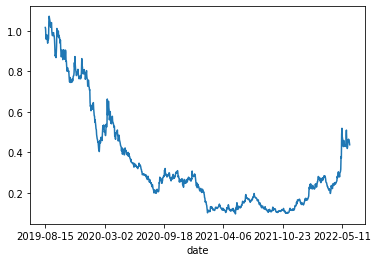

In [18]:
port_weights_df = pd.DataFrame(port_weights, columns = port_weights.keys(), index = range(1, 1028))

port_test = port1.mul(port_weights_df.values, axis = 0).sum(axis = 1)

port_returns = np.exp(np.log1p(port_test).cumsum())

port_returns.plot()

<AxesSubplot:ylabel='0'>

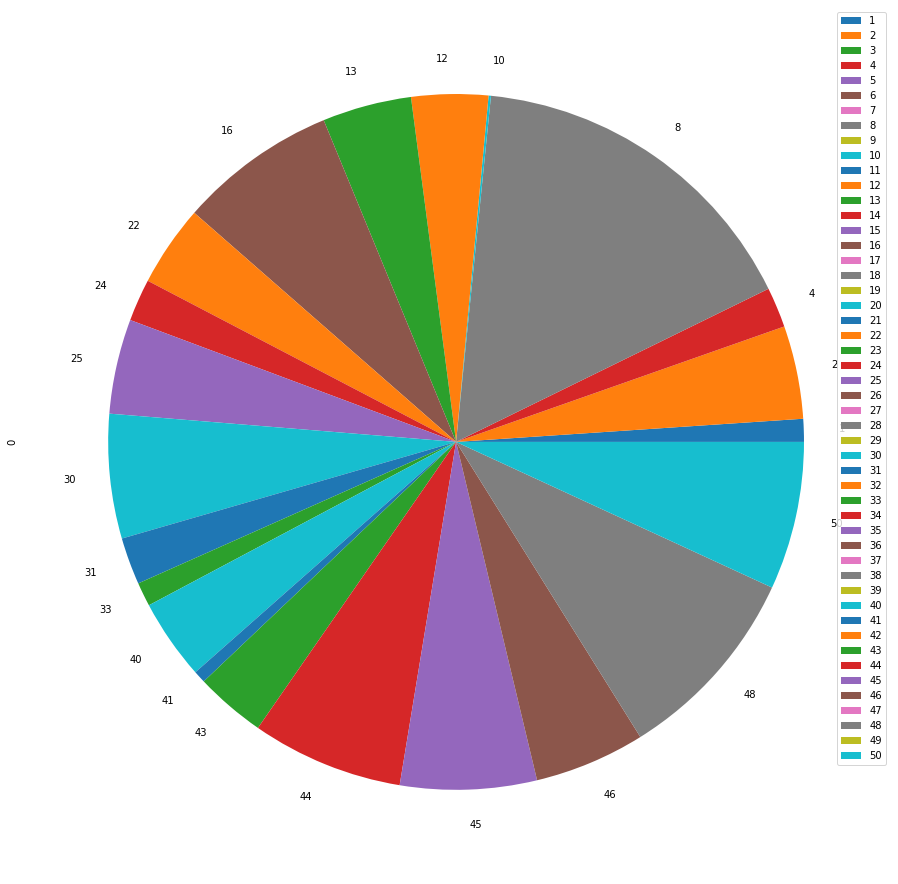

In [51]:
weights_plot = pd.DataFrame(port_weights, columns = port_weights.keys(), index = range(1))
weights_plot.transpose().plot(kind='pie', y = 0, figsize= (16, 16))

In [52]:
port_returns

date
2019-08-15    1.016217
2019-08-16    1.009226
2019-08-17    0.971061
2019-08-18    0.958319
2019-08-19    0.977582
                ...   
2022-06-02    0.465406
2022-06-03    0.463724
2022-06-04    0.460825
2022-06-05    0.449964
2022-06-06    0.438131
Length: 1027, dtype: float64

In [ ]:
## DEFINED FUNCTION FOR SHRINKAGE

def shrinkage(returns: np.array) -> Tuple[np.array, float, float]:

    t, n = returns.shape
    mean_returns = np.mean(returns, axis=0)
    returns -= mean_returns
    sample_cov = returns.transpose() @ returns / t

    # sample average correlation
    var = np.diag(sample_cov).reshape(-1, 1)
    sqrt_var = var ** 0.5
    unit_cor_var = sqrt_var * sqrt_var.transpose()
    average_cor = ((sample_cov / unit_cor_var).sum() - n) / n / (n - 1)
    prior = unit_cor_var
    np.fill_diagonal(prior, var)

    # pi-hat
    y = returns ** 2
    phi_mat = (y.transpose() @ y) / t - sample_cov ** 2
    phi = phi_mat.sum()

    # rho-hat
    theta_mat = ((returns ** 3).transpose() @ returns) / t - var * sample_cov
    np.fill_diagonal(theta_mat.values, 0)
    rho = (
            np.diag(phi_mat).sum()
            + average_cor * (1 / sqrt_var @ sqrt_var.transpose() * theta_mat).sum()
    )

    # gamma-hat
    gamma = np.linalg.norm(sample_cov - prior, "fro") ** 2

    # shrinkage constant
    kappa = (phi - rho) / gamma
    shrink = max(0, min(1, kappa.all() / t))

    # estimator
    sigma = shrink * prior + (1 - shrink) * sample_cov

    return sigma, average_cor, shrink

In [ ]:
shrinkage(returns)